In [1]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
x = np.arange(0.01, 1., .01)
ctr = np.arange(0.1, 1., .1)

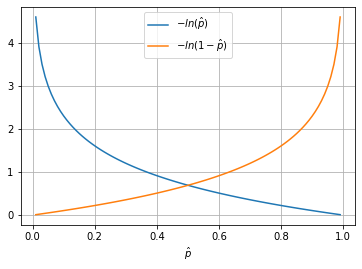

In [3]:
sb.lineplot(x, -np.log(x), label=r'$-ln(\hat p)$')
sb.lineplot(x, -np.log(1 - x), label=r'$-ln(1-\hat p)$')
plt.legend(loc=9)
plt.xlabel(r'$\hat p$');
plt.grid();
plt.savefig('images/neg_log_neg_log_reflect.png', bbox_inches='tight');

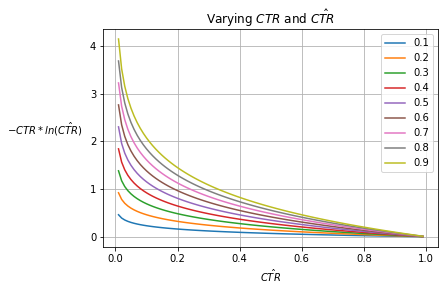

In [4]:
for _ctr in ctr:
    sb.lineplot(x, -_ctr * np.log(x), label=round(_ctr, 2));

plt.title('Varying $CTR$ and $\hat{CTR}$');
plt.ylabel('$-CTR*ln(\hat{CTR})$', rotation=0, labelpad=45);
plt.xlabel(r'$\hat{CTR}$');
plt.grid();
plt.savefig('images/ctr_neg_log.png', bbox_inches='tight');

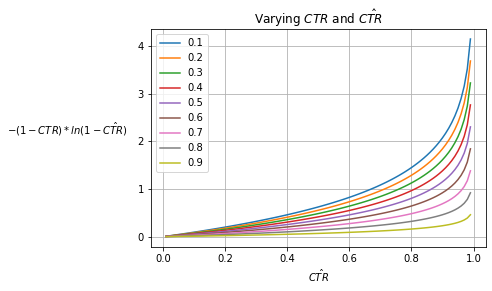

In [5]:
for _ctr in ctr:
    sb.lineplot(x, -(1 - _ctr) * np.log(1 - x), label=round(_ctr, 2));

plt.title('Varying $CTR$ and $\hat{CTR}$');
plt.ylabel('$-(1-CTR)*ln(1-\hat{CTR})$', rotation=0, labelpad=70);
plt.xlabel(r'$\hat{CTR}$');
plt.grid();
plt.savefig('images/ctr_neg_log_reflect.png', bbox_inches='tight');

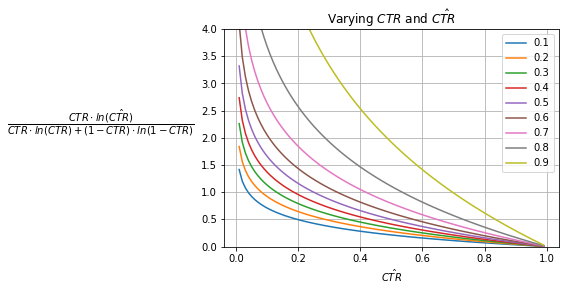

In [6]:
for _ctr in ctr:
    sb.lineplot(x, (_ctr * np.log(x)) / (_ctr * np.log(_ctr) + (1 - _ctr) * np.log(1 - _ctr)), label=round(_ctr, 2));

plt.title('Varying $CTR$ and $\hat{CTR}$');
plt.ylabel('$\dfrac{CTR \cdot ln(\hat{CTR})}{CTR \cdot ln(CTR) + (1-CTR) \cdot ln(1-CTR)}$', rotation=0, labelpad=100);
plt.xlabel(r'$\hat{CTR}$');
plt.ylim(0,4)
plt.grid();
plt.savefig('images/ctr_neg_log_norm.png', bbox_inches='tight');

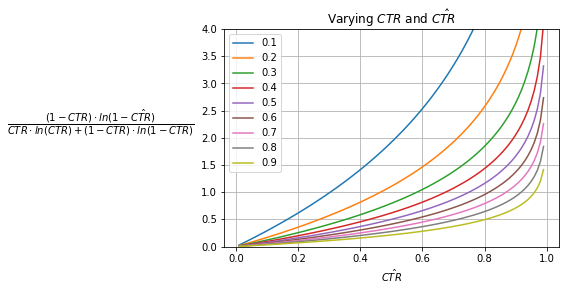

In [7]:
for _ctr in ctr:
    sb.lineplot(x, ((1 - _ctr) * np.log(1 - x)) / (_ctr * np.log(_ctr) + (1 - _ctr) * np.log(1 - _ctr)), label=round(_ctr, 2));
    
plt.title('Varying $CTR$ and $\hat{CTR}$');
plt.ylabel('$\dfrac{(1-CTR) \cdot ln(1-\hat{CTR})}{CTR \cdot ln(CTR) + (1-CTR) \cdot ln(1-CTR)}$', rotation=0, labelpad=100);
plt.xlabel(r'$\hat{CTR}$');
plt.ylim(0,4)
plt.grid();
plt.savefig('images/ctr_neg_log_norm_reflect.png', bbox_inches='tight');

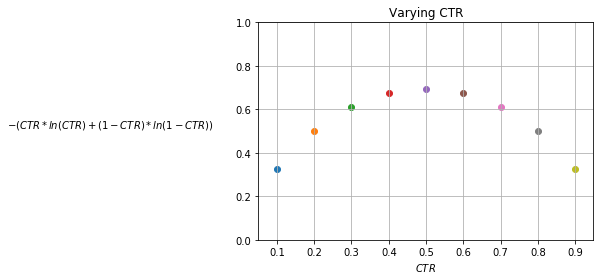

In [8]:
for _ctr in ctr:
    ctr_ent = -((_ctr * np.log(_ctr)) + ((1 - _ctr) * np.log(1 - _ctr)))
    plt.scatter(_ctr, ctr_ent, label=round(_ctr, 2));

plt.title('Varying CTR');
plt.ylabel('$-(CTR*ln(CTR)+(1-CTR)*ln(1-CTR))$', rotation=0, labelpad=125);
plt.xlabel(r'$CTR$');
plt.ylim(0,1)
plt.grid();
plt.savefig('images/ctr_ent.png', bbox_inches='tight');

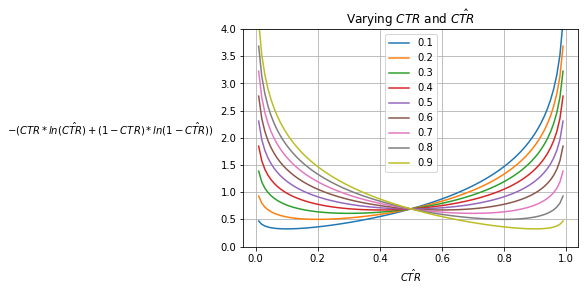

In [9]:
for _ctr in ctr:
    cross_ent = -(_ctr * np.log(x) + (1 - _ctr) * np.log(1 - x))
    sb.lineplot(x, cross_ent, label=round(_ctr, 2));
    
plt.title('Varying $CTR$ and $\hat{CTR}$');
plt.ylabel('$-(CTR*ln(\hat{CTR})+(1-CTR)*ln(1-\hat{CTR}))$', rotation=0, labelpad=110);
plt.xlabel(r'$\hat{CTR}$');
plt.ylim(0,4)
plt.grid();
plt.savefig('images/ctr_cross_ent.png', bbox_inches='tight');

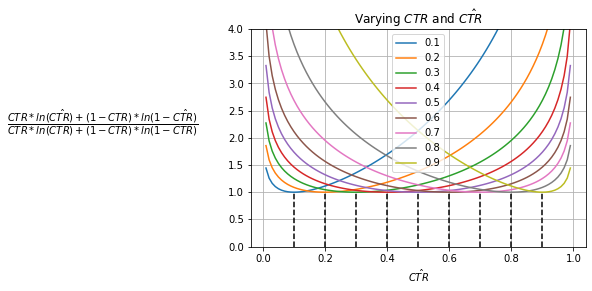

In [10]:
for _ctr in ctr:
    numerator = _ctr * np.log(x) + (1 - _ctr) * np.log(1 - x)
    denominator = _ctr * np.log(_ctr) + (1 - _ctr) * np.log(1 - _ctr)
    ne = numerator / denominator
    sb.lineplot(x, ne, label=round(_ctr, 2));
    plt.axvline(_ctr, ymin=0, ymax=.25, c='black', linestyle='--')

plt.title('Varying $CTR$ and $\hat{CTR}$');
plt.ylabel('$\dfrac{CTR*ln(\hat{CTR})+(1-CTR)*ln(1-\hat{CTR})}{CTR*ln(CTR)+(1-CTR)*ln(1-CTR)}$',
           rotation=0, labelpad=125);
plt.xlabel(r'$\hat{CTR}$');
plt.ylim(0,4)
plt.grid();
plt.savefig('images/ctr_norm_cross_ent.png', bbox_inches='tight');

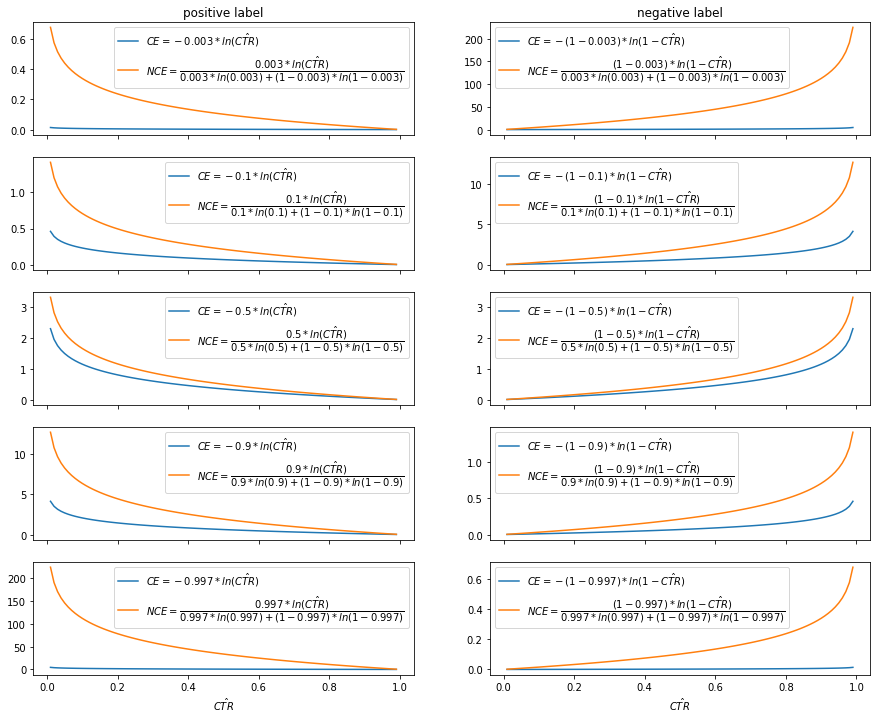

In [11]:
ctr = [.003, .1, .5, .9, .997]
fig, ax = plt.subplots(5, 2, figsize=(15, 12), sharex=True)
i = 0

for _ctr in ctr:

    sb.lineplot(x,
                -(_ctr * np.log(x)),
                label='$CE=-%s*ln(\hat{CTR})$' % _ctr,
                ax=ax[i][0]);
    sb.lineplot(x,
                (_ctr * np.log(x)) / (_ctr * np.log(_ctr) + (1 - _ctr) * np.log(1 - _ctr)),
                label='$NCE=\dfrac{%s*ln(\hat{CTR})}{%s*ln(%s)+(1-%s)*ln(1-%s)}$' % ((_ctr,) * 5),
                ax=ax[i][0]);

    sb.lineplot(x,
                -(1 - _ctr) * np.log(1 - x),
                label='$CE=-(1-%s)*ln(1-\hat{CTR})$' % _ctr,
               ax=ax[i][1]);
    sb.lineplot(x,
                ((1 - _ctr) * np.log(1 - x)) / (_ctr * np.log(_ctr) + (1 - _ctr) * np.log(1 - _ctr)),
                label='$NCE=\dfrac{(1-%s)*ln(1-\hat{CTR})}{%s*ln(%s)+(1-%s)*ln(1-%s)}$' % ((_ctr,) * 5),
               ax=ax[i][1]);
    i += 1
    
ax[0][0].set_title('positive label');
ax[0][1].set_title('negative label');
ax[-1][0].set_xlabel('$\hat{CTR}$');
ax[-1][1].set_xlabel('$\hat{CTR}$');
plt.savefig('images/ctr_ce_nce.png', bbox_inches='tight');

In [12]:
# see https://www.math3d.org/nobk3tHh to continue with 3D viz